Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [6]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


EDA

In [12]:
df.shape

(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
df.drop(columns={'Unnamed: 3','Unnamed: 2','Unnamed: 4'},axis=1,inplace=True)

In [27]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [28]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.duplicated().sum()

403

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(5169, 2)

In [29]:
freq=df['target'].value_counts()
freq

target
ham     4516
spam     653
Name: count, dtype: int64

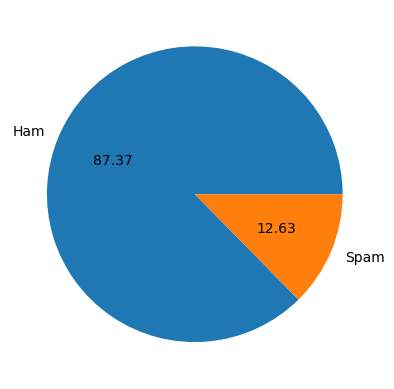

In [31]:
plt.pie(freq,labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [32]:
#Data is imbalanced

EDA 2

In [33]:
import nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df['num_chars']=df['text'].apply(lambda x:len(x))
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentc']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.head()

,target,text,num_chars,num_words,num_sentc
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
df[['num_chars','num_words','num_sentc']].describe()

,num_chars,num_words,num_sentc
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
df[df['target']=='ham'][['num_chars','num_words','num_sentc']].describe()

,num_chars,num_words,num_sentc
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
df[df['target']=='spam'][['num_chars','num_words','num_sentc']].describe()

,num_chars,num_words,num_sentc
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

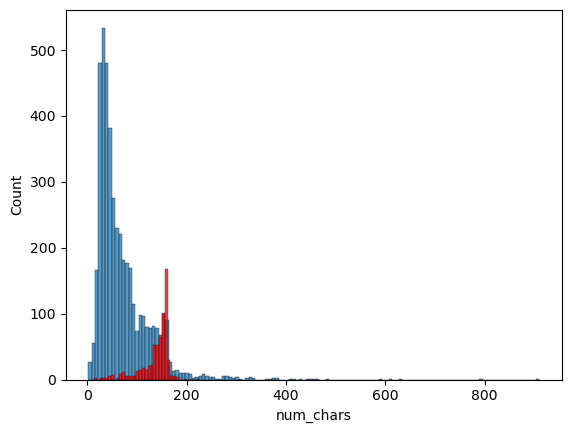

In [49]:
sns.histplot(df[df['target']=='ham']['num_chars'])
sns.histplot(df[df['target']=='spam']['num_chars'],color='red')

In [50]:
# from this we got the knowledge that in spam msgs no of characters are more than the ham msgs

<Axes: xlabel='num_words', ylabel='Count'>

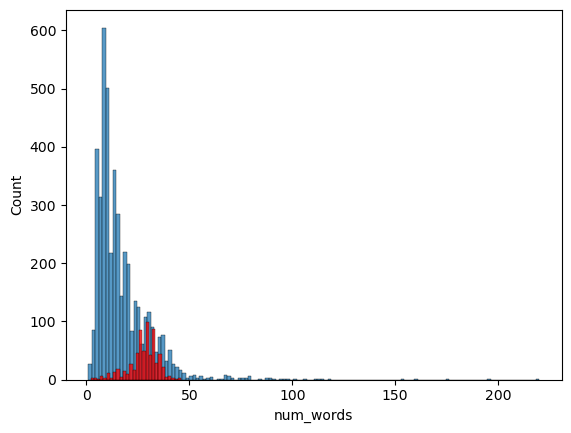

In [51]:
sns.histplot(df[df['target']=='ham']['num_words'])
sns.histplot(df[df['target']=='spam']['num_words'],color='red')

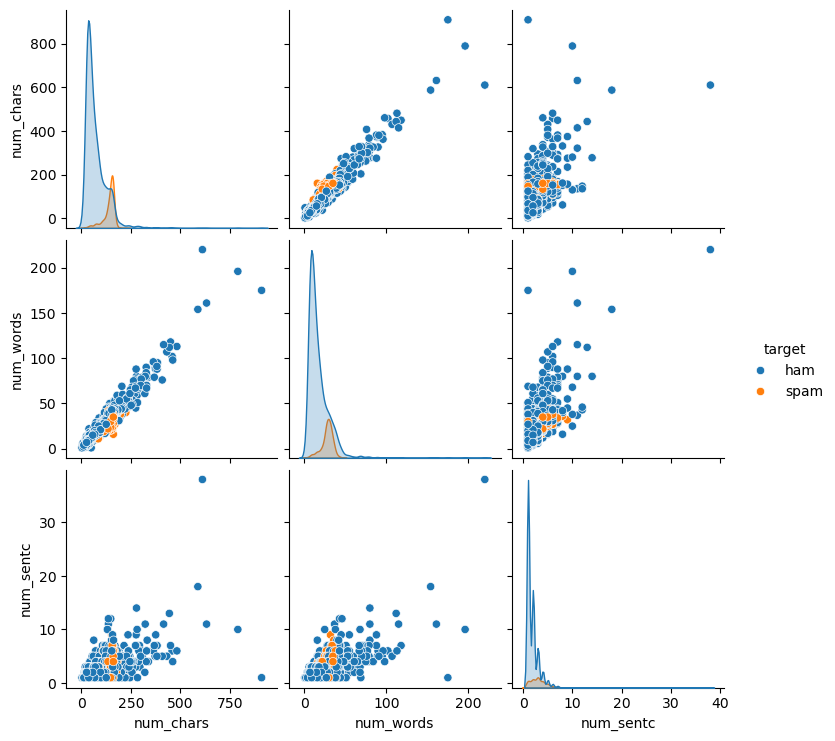

In [52]:
sns.pairplot(df,hue="target")

In [53]:
# Many outliers are present in data

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [61]:
cor=df.drop(columns='text',axis=1).corr()
cor

,target,num_chars,num_words,num_sentc
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentc,0.263939,0.624139,0.679971,1.000000


<Axes: >

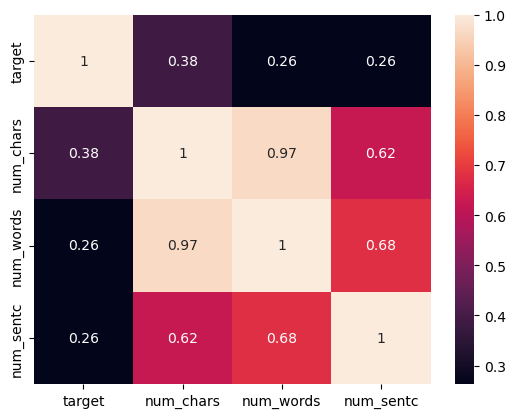

In [63]:
sns.heatmap(cor,annot=True)

Data PreProcessing

In [80]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
st=PorterStemmer()
stop=set(stopwords.words("english"))
st

<PorterStemmer>

In [90]:
def clean(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stop and i not in string.punctuation:
            y.append(st.stem(i))
    return " ".join(y)

In [91]:
clean("Did you like the way i was presenting on ML?")

'like way present ml'

In [93]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [94]:
clean(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [95]:
df['text']=df['text'].apply(clean)

In [96]:
df.head()

,target,text,num_chars,num_words,num_sentc
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


In [103]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [105]:
spam_wc=wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

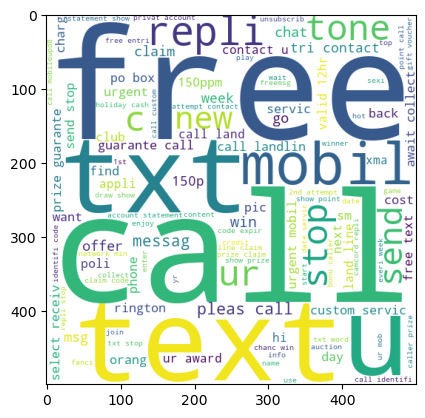

In [106]:
plt.imshow(spam_wc)

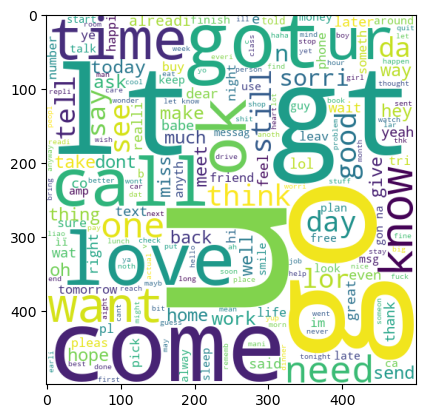

In [107]:
ham_wc=wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [129]:
spam_corpus=[]
for msg in df[df['target']==1]['text'].tolist():
    for words in msg.split():
        spam_corpus.append((words))

In [119]:
len(spam_corpus)

9939

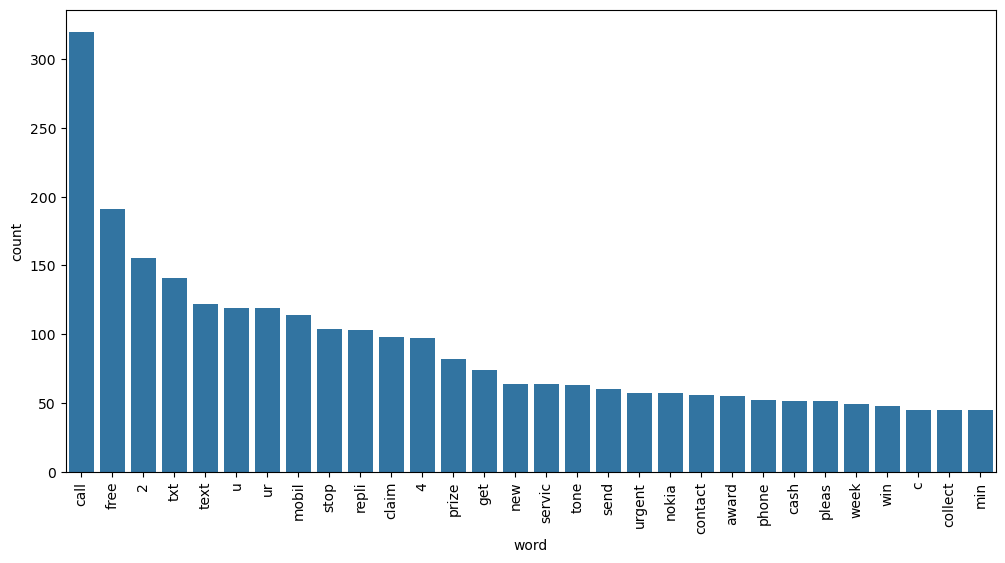

In [130]:
word_counts = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_common = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_common)
plt.xticks(rotation='vertical')
plt.show()

In [133]:
ham_corpus=[]
for msg in df[df['target']==0]['text'].tolist():
    for words in msg.split():
        ham_corpus.append((words))

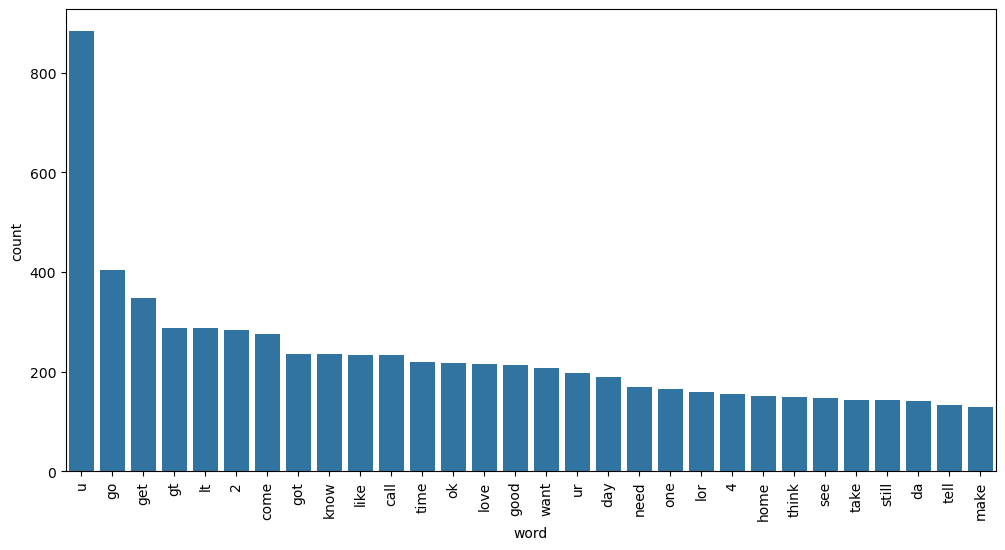

In [134]:
word_counts2 = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_common2 = pd.DataFrame(word_counts2, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_common2)
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [208]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [209]:
x=cv.fit_transform(df['text']).toarray()

In [166]:
x.shape

(5169, 6708)

In [138]:
y=df['target'].values

In [139]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [168]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [169]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [193]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [194]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [195]:
gnb_accuracy=accuracy_score(y_pred,y_test)
mat=confusion_matrix(y_pred,y_test)
prec=precision_score(y_pred,y_test)

In [196]:
print(gnb_accuracy)
print(mat)
print(prec)

0.8800773694390716
[[792  20]
 [104 118]]
0.855072463768116


In [197]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)

In [198]:
mnb_accuracy=accuracy_score(y_pred2,y_test)
mat2=confusion_matrix(y_pred2,y_test)
prec2=precision_score(y_pred2,y_test)

In [199]:
print(mnb_accuracy)
print(mat2)
print(prec2)

0.9642166344294004
[[871  12]
 [ 25 126]]
0.9130434782608695


In [200]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)

In [201]:
bnb_accuracy=accuracy_score(y_pred3,y_test)
mat3=confusion_matrix(y_pred3,y_test)
prec3=precision_score(y_pred3,y_test)

In [202]:
print(bnb_accuracy)
print(mat3)
print(prec3)

0.9700193423597679
[[893  28]
 [  3 110]]
0.7971014492753623


Since we know that our model is giving good accuracy and 
better precision with Multinomial Naive Bayes, we are using it.

In [213]:
l=['ham','spam']

In [214]:
data=input("enter Your message/text")
dt=cv.transform([data]).toarray()
pd=mnb.predict(dt)[0]
l[pd]

enter Your message/text Free entry in 2 a wkly comp to win FA Cup final


'spam'

In [217]:
import pickle
pickle.dump(mnb,open("model.pkl",'wb'))
pickle.dump(cv,open("Cv.pkl","wb"))